In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
import json

data1 = []

# Assuming the NDJSON data is stored in a file called 'data.ndjson'
with open("../data/domain1_train.json", 'r') as file:
    for line in file:
        data1.append(json.loads(line.strip()))

data2 = []

# Assuming the NDJSON data is stored in a file called 'data.ndjson'
with open("../data/domain2_train.json", 'r') as file:
    for line in file:
        data2.append(json.loads(line.strip()))

test_data = []

with open("../data/test_set.json", 'r') as file:
    for line in file:
        test_data.append(json.loads(line.strip()))


### 3-gram for domain 1 data

In [39]:
def to_3gram(sequence):
    return [' '.join(map(str, sequence[i:i+3])) for i in range(len(sequence) - 2)]


# Convert to 3-gram
for item in data1:
    item["text"] = to_3gram(item["text"])

print(data1)


[{'text': ['70 746 825', '746 825 109', '825 109 2083', '109 2083 0', '2083 0 2', '0 2 0', '2 0 0', '0 0 0', '0 0 9', '0 9 0', '9 0 1004', '0 1004 19', '1004 19 0', '19 0 0', '0 0 7', '0 7 913'], 'label': 1}, {'text': ['1209 179 1952', '179 1952 4', '1952 4 4959', '4 4959 7', '4959 7 0', '7 0 2', '0 2 978', '2 978 1522', '978 1522 6', '1522 6 2874', '6 2874 1051', '2874 1051 1'], 'label': 1}, {'text': ['287 3 3330', '3 3330 0', '3330 0 23', '0 23 12', '23 12 13', '12 13 465', '13 465 74', '465 74 8', '74 8 0', '8 0 8', '0 8 4', '8 4 1809', '4 1809 82', '1809 82 8', '82 8 4180', '8 4180 3378', '4180 3378 8', '3378 8 22', '8 22 0', '22 0 0', '0 0 3149', '0 3149 0', '3149 0 7', '0 7 1862', '7 1862 4', '1862 4 2960', '4 2960 607', '2960 607 797', '607 797 7', '797 7 89', '7 89 0', '89 0 1927', '0 1927 9', '1927 9 70', '9 70 1232', '70 1232 1'], 'label': 1}, {'text': ['0 0 3', '0 3 592', '3 592 19', '592 19 2', '19 2 706', '2 706 1439', '706 1439 2575', '1439 2575 7', '2575 7 2', '7 2 0', '

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np



# Convert the sequences to 3-gram strings
def to_3gram(sequence):
    return ['_'.join(map(str, sequence[i:i+3])) for i in range(len(sequence) - 2)]

def to_3gram_model(data):
    data2_3gram = [{"text": to_3gram(item['text']), "label": item['label']} for item in data]

    # Convert the 3-gram lists to space-separated string to work with CountVectorizer
    texts = [' '.join(item['text']) for item in data2_3gram]
    labels = [item['label'] for item in data2_3gram]

    # Splitting the data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

    # Create a CountVectorizer instance
    vectorizer = CountVectorizer(ngram_range=(1, 1))  # We use 1-gram here because our data is already in 3-gram format
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # Training a logistic regression model
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train_vec, y_train)

    # Predicting and evaluating the model
    y_pred = clf.predict(X_test_vec)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

to_3gram_model(data1)

Accuracy: 0.9305128205128205
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1943
           1       0.92      0.95      0.93      1957

    accuracy                           0.93      3900
   macro avg       0.93      0.93      0.93      3900
weighted avg       0.93      0.93      0.93      3900



### 3-gram for domain 2 data

In [42]:
to_3gram_model(data2)

Accuracy: 0.8577181208053691
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2544
           1       0.66      0.06      0.11       436

    accuracy                           0.86      2980
   macro avg       0.76      0.53      0.51      2980
weighted avg       0.83      0.86      0.80      2980



Fold Score: 0.8577
Fold Score: 0.8624
Fold Score: 0.8490
Fold Score: 0.8507
Fold Score: 0.8581
[0.8577181208053691, 0.8624161073825504, 0.8489932885906041, 0.8506711409395973, 0.8580536912751678]


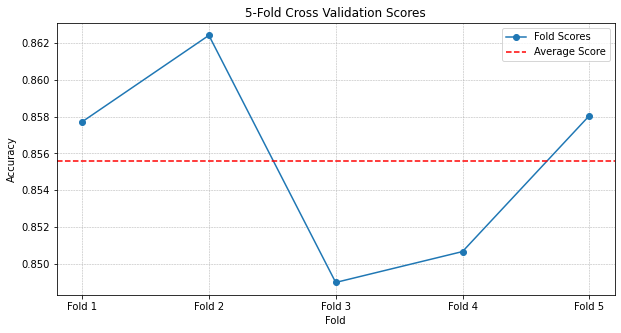

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.model_selection import KFold


# Convert the sequences to 3-gram strings
def to_3gram(sequence):
    return ['_'.join(map(str, sequence[i:i+3])) for i in range(len(sequence) - 2)]

def to_3gram_model(data):
    data2_3gram = [{"text": to_3gram(item['text']), "label": item['label']} for item in data]

    # Convert the 3-gram lists to space-separated string to work with CountVectorizer
    texts = [' '.join(item['text']) for item in data2_3gram]
    labels = [item['label'] for item in data2_3gram]
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = []

    # Loop over each fold
    for train_index, test_index in kf.split(texts):
        X_train, X_test = [texts[i] for i in train_index], [texts[i] for i in test_index]
        y_train, y_test = [labels[i] for i in train_index], [labels[i] for i in test_index]
        
        # Convert texts to vectors
        vectorizer = CountVectorizer(ngram_range=(1, 1))
        X_train_vec = vectorizer.fit_transform(X_train)
        X_test_vec = vectorizer.transform(X_test)
        
        # Train your model (here I'm using Logistic Regression as an example, but you can replace this with your NN)
        clf = LogisticRegression(max_iter=1000)
        clf.fit(X_train_vec, y_train)
        
        # Evaluate the model
        y_pred = clf.predict(X_test_vec)
        score = accuracy_score(y_test, y_pred)
        scores.append(score)
        print(f"Fold Score: {score:.4f}")
    print(scores)
    plt.figure(figsize=(10, 5))
    plt.plot(scores, '-o', label='Fold Scores')
    plt.axhline(np.mean(scores), color='red', linestyle='--', label='Average Score')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title('5-Fold Cross Validation Scores')
    plt.legend()
    plt.xticks(range(5), [f"Fold {i+1}" for i in range(5)])
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()
    

to_3gram_model(data2)

Fold Score: 0.8926
Fold Score: 0.8800
Fold Score: 0.8951
Fold Score: 0.8828
Fold Score: 0.8897
[0.8925641025641026, 0.88, 0.8951282051282051, 0.8828205128205128, 0.8897435897435897]


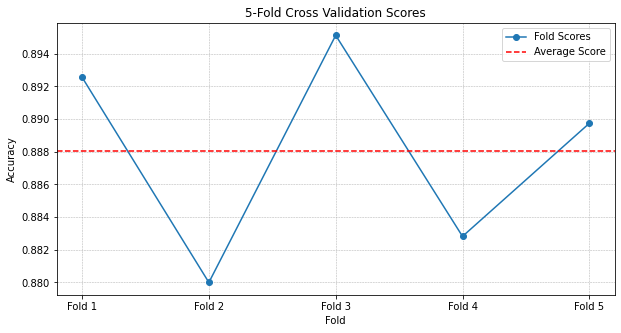

In [32]:
to_3gram_model(data1)

## predict

In [7]:
import joblib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import pandas as pd

def to_3gram(sequence):
    return ['_'.join(map(str, sequence[i:i+3])) for i in range(len(sequence) - 2)]

def to_3gram_model(data, test_data):
    data2_3gram = [{"text": to_3gram(item['text']), "label": item['label']} for item in data]
    
    texts = [' '.join(item['text']) for item in data2_3gram]
    labels = [item['label'] for item in data2_3gram]
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = []

    for fold_num, (train_index, test_index) in enumerate(kf.split(texts), start=1):
        X_train, X_test = [texts[i] for i in train_index], [texts[i] for i in test_index]
        y_train, y_test = [labels[i] for i in train_index], [labels[i] for i in test_index]
        
        vectorizer = CountVectorizer(ngram_range=(1, 1))
        X_train_vec = vectorizer.fit_transform(X_train)
        X_test_vec = vectorizer.transform(X_test)
        
        clf = LogisticRegression(max_iter=1000)
        clf.fit(X_train_vec, y_train)
        
        y_pred = clf.predict(X_test_vec)
        score = accuracy_score(y_test, y_pred)
        scores.append(score)

        # Save the third fold model
        if fold_num == 3:
            joblib.dump(clf, "fold_3_model.pkl")
            joblib.dump(vectorizer, "fold_3_vectorizer.pkl")
    
    print(scores)
    # ... [rest of your plotting code]

# Load the saved model and predict
def predict_test_set(test_data):
    # Convert test data to 3-gram
    test_3gram = [' '.join(to_3gram(item['text'])) for item in test_data]
    
    clf = joblib.load("fold_3_model.pkl")
    vectorizer = joblib.load("fold_3_vectorizer.pkl")
    test_vec = vectorizer.transform(test_3gram)
    
    predictions = clf.predict(test_vec)
    
    # Save predictions in the specified format
    results = pd.DataFrame({
        "id": range(len(predictions)),
        "class": predictions
    })
    
    results.to_csv("../data/results/3gram_predictions.csv", index=False)

# Call your functions
to_3gram_model(data2, test_data)
predict_test_set(test_data)


[0.8577181208053691, 0.8624161073825504, 0.8489932885906041, 0.8506711409395973, 0.8580536912751678]


## feedback
3-gram doesn't perform well.. as most of the results are predicted as 0